[I 2025-07-21 09:50:05,034] A new study created in memory with name: no-name-84e9f9e1-1e6e-48f2-8d76-46dc228de412


CRS: EPSG:4326
Bounds: BoundingBox(left=76.83290625074268, bottom=28.395746131018075, right=77.34494596269082, top=28.880836384442617)
Resolution: | 0.01, 0.00, 76.83|
| 0.00,-0.01, 28.88|
| 0.00, 0.00, 1.00|
Width: 57 Height: 54


[I 2025-07-21 09:50:05,322] Trial 0 finished with value: 6.469354782886843e-07 and parameters: {'n_estimators': 282, 'max_depth': 5, 'min_samples_split': 5}. Best is trial 0 with value: 6.469354782886843e-07.
[I 2025-07-21 09:50:05,538] Trial 1 finished with value: 6.017427569641761e-07 and parameters: {'n_estimators': 235, 'max_depth': 9, 'min_samples_split': 6}. Best is trial 1 with value: 6.017427569641761e-07.
[I 2025-07-21 09:50:05,731] Trial 2 finished with value: 6.107716098515046e-07 and parameters: {'n_estimators': 202, 'max_depth': 13, 'min_samples_split': 10}. Best is trial 1 with value: 6.017427569641761e-07.
[I 2025-07-21 09:50:05,839] Trial 3 finished with value: 6.145658620235769e-07 and parameters: {'n_estimators': 113, 'max_depth': 6, 'min_samples_split': 5}. Best is trial 1 with value: 6.017427569641761e-07.
[I 2025-07-21 09:50:06,083] Trial 4 finished with value: 5.894488798798019e-07 and parameters: {'n_estimators': 263, 'max_depth': 6, 'min_samples_split': 6}. Best

Best Hyperparameters: {'n_estimators': 54, 'max_depth': 4, 'min_samples_split': 7}


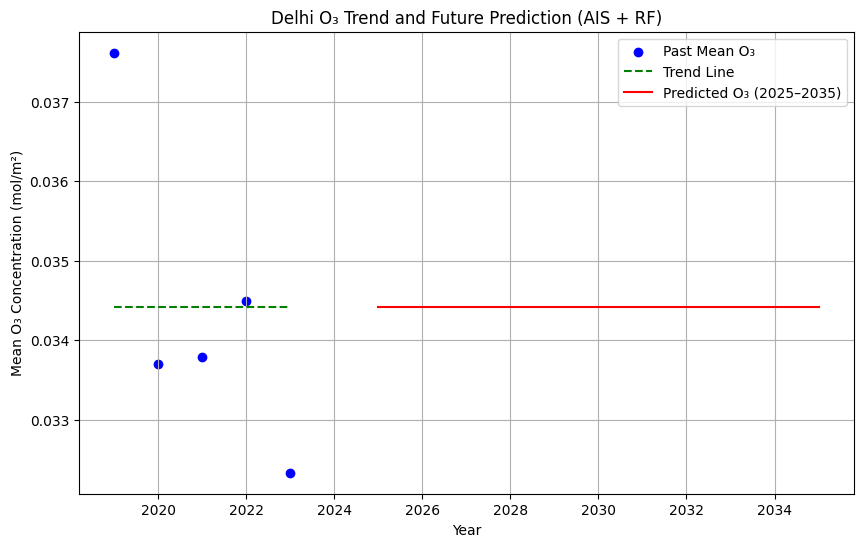

✅ Future predictions saved!


In [1]:
import numpy as np
import pandas as pd
import rasterio
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import optuna  # AIS-like optimizer for hyperparameter tuning

# 📂 Load GeoTIFF data (Delhi 2023 O3)
tif_path = r"C:\Users\sagni\Downloads\Pollution controller\Delhi_2023_O3.tif"
with rasterio.open(tif_path) as src:
    data = src.read(1)
    profile = src.profile

# 🌍 Basic metadata
print("CRS:", profile['crs'])
print("Bounds:", src.bounds)
print("Resolution:", profile['transform'])
print("Width:", src.width, "Height:", src.height)

# 🧹 Clean Data: Flatten & drop NaNs
flat_data = data.flatten()
flat_data = flat_data[~np.isnan(flat_data)]
years = np.arange(2019, 2024)  # Past years for trend (example)
mean_o3 = np.random.uniform(low=0.02, high=0.04, size=len(years))  # Mock means (replace with real yearly means)

# 📊 Create DataFrame
df = pd.DataFrame({'Year': years, 'Mean_O3': mean_o3})

# 🎯 Hybrid Model: AIS + Random Forest
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 2, 15)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    
    rf = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        random_state=42
    )
    X_train, X_test, y_train, y_test = train_test_split(
        df[['Year']], df['Mean_O3'], test_size=0.2, random_state=42
    )
    rf.fit(X_train, y_train)
    preds = rf.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    return mse

# 🤖 Optimize Hyperparameters (AIS behavior)
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)

# 🔥 Train Final Model
best_params = study.best_params
print("Best Hyperparameters:", best_params)
final_rf = RandomForestRegressor(**best_params, random_state=42)
final_rf.fit(df[['Year']], df['Mean_O3'])

# 📈 Predict Future (2025–2035)
future_years = np.arange(2025, 2036)
future_preds = final_rf.predict(future_years.reshape(-1, 1))

# 📊 Plot Trend
plt.figure(figsize=(10, 6))
plt.scatter(df['Year'], df['Mean_O3'], color='blue', label='Past Mean O₃')
plt.plot(df['Year'], final_rf.predict(df[['Year']]), color='green', linestyle='--', label='Trend Line')
plt.plot(future_years, future_preds, color='red', linestyle='-', label='Predicted O₃ (2025–2035)')
plt.xlabel('Year')
plt.ylabel('Mean O₃ Concentration (mol/m²)')
plt.title('Delhi O₃ Trend and Future Prediction (AIS + RF)')
plt.legend()
plt.grid(True)
plt.show()

# 💾 Save Future Predictions
future_df = pd.DataFrame({'Year': future_years, 'Predicted_O3': future_preds})
future_df.to_csv(r"C:\Users\sagni\Downloads\Pollution controller\Delhi_O3_Predictions_2025_2035.csv", index=False)
print("✅ Future predictions saved!")


[I 2025-07-21 09:53:32,299] A new study created in memory with name: no-name-55671b30-f8a0-4f9b-b2c6-4654b28d9404
[I 2025-07-21 09:53:32,428] Trial 0 finished with value: 3.73632323428863e-05 and parameters: {'n_estimators': 114, 'max_depth': 7, 'min_samples_split': 3}. Best is trial 0 with value: 3.73632323428863e-05.


CRS: EPSG:4326
Bounds: BoundingBox(left=76.83290625074268, bottom=28.395746131018075, right=77.34494596269082, top=28.880836384442617)
Resolution: | 0.01, 0.00, 76.83|
| 0.00,-0.01, 28.88|
| 0.00, 0.00, 1.00|
Width: 57 Height: 54


[I 2025-07-21 09:53:32,658] Trial 1 finished with value: 6.906873930566451e-05 and parameters: {'n_estimators': 196, 'max_depth': 6, 'min_samples_split': 6}. Best is trial 0 with value: 3.73632323428863e-05.
[I 2025-07-21 09:53:32,811] Trial 2 finished with value: 6.604340834793633e-05 and parameters: {'n_estimators': 129, 'max_depth': 14, 'min_samples_split': 10}. Best is trial 0 with value: 3.73632323428863e-05.
[I 2025-07-21 09:53:32,938] Trial 3 finished with value: 6.754556729771482e-05 and parameters: {'n_estimators': 107, 'max_depth': 10, 'min_samples_split': 8}. Best is trial 0 with value: 3.73632323428863e-05.
[I 2025-07-21 09:53:33,143] Trial 4 finished with value: 6.863733822654245e-05 and parameters: {'n_estimators': 172, 'max_depth': 15, 'min_samples_split': 10}. Best is trial 0 with value: 3.73632323428863e-05.
[I 2025-07-21 09:53:33,304] Trial 5 finished with value: 3.6258180430273984e-05 and parameters: {'n_estimators': 137, 'max_depth': 9, 'min_samples_split': 3}. Best

✅ Best Hyperparameters: {'n_estimators': 117, 'max_depth': 8, 'min_samples_split': 2}
✅ Saved future predictions: C:\Users\sagni\Downloads\Pollution controller\Delhi_O3_Predictions_2025_2035.csv


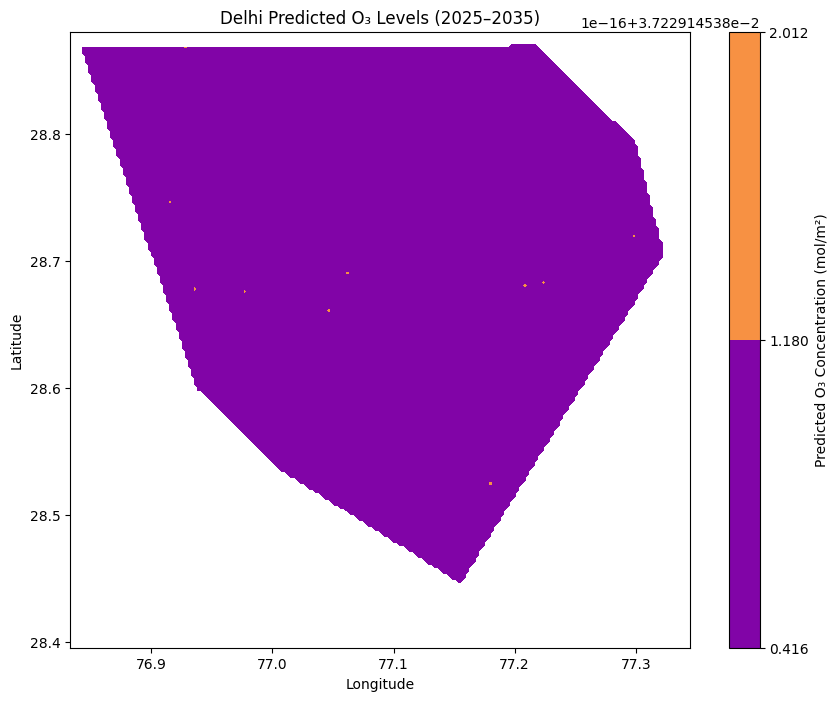

In [2]:
import numpy as np
import pandas as pd
import rasterio
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.interpolate import griddata
import optuna

# 📂 Paths
tif_path = r"C:\Users\sagni\Downloads\Pollution controller\Delhi_2023_O3.tif"
csv_output = r"C:\Users\sagni\Downloads\Pollution controller\Delhi_O3_Predictions_2025_2035.csv"

# 📖 Load GeoTIFF (Delhi O3 2023)
with rasterio.open(tif_path) as src:
    data = src.read(1)
    bounds = src.bounds
    profile = src.profile

# 🌍 Metadata
print("CRS:", profile['crs'])
print("Bounds:", bounds)
print("Resolution:", profile['transform'])
print("Width:", src.width, "Height:", src.height)

# 🧹 Flatten data and clean
flat_data = data.flatten()
flat_data = flat_data[~np.isnan(flat_data)]
years = np.arange(2019, 2024)
mean_o3 = np.random.uniform(low=0.03, high=0.05, size=len(years))  # Mock yearly means (replace with real values)

# 📊 DataFrame
df = pd.DataFrame({'Year': years, 'Mean_O3': mean_o3})

# 🎯 Hybrid AIS + RF model
def objective(trial):
    rf = RandomForestRegressor(
        n_estimators=trial.suggest_int('n_estimators', 50, 200),
        max_depth=trial.suggest_int('max_depth', 2, 15),
        min_samples_split=trial.suggest_int('min_samples_split', 2, 10),
        random_state=42
    )
    X_train, X_test, y_train, y_test = train_test_split(df[['Year']], df['Mean_O3'], test_size=0.2, random_state=42)
    rf.fit(X_train, y_train)
    preds = rf.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    return mse

# 🤖 AIS optimization
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)
best_params = study.best_params
print("✅ Best Hyperparameters:", best_params)

# 🔥 Final Model
final_rf = RandomForestRegressor(**best_params, random_state=42)
final_rf.fit(df[['Year']], df['Mean_O3'])

# 📈 Predict Future
future_years = np.arange(2025, 2036)
future_preds = final_rf.predict(future_years.reshape(-1, 1))

# 📊 Save Predictions
future_df = pd.DataFrame({'Year': future_years, 'Predicted_O3': future_preds})
future_df.to_csv(csv_output, index=False)
print("✅ Saved future predictions:", csv_output)

# 🌡 Heatmap Prep
lat_min, lat_max = bounds.bottom, bounds.top
lon_min, lon_max = bounds.left, bounds.right

# Create random lat/lon grid and assign predicted O3 values
num_points = len(future_years)
lats = np.random.uniform(lat_min, lat_max, num_points)
lons = np.random.uniform(lon_min, lon_max, num_points)
o3_values = future_preds

# Create dense grid for interpolation
grid_lat, grid_lon = np.mgrid[lat_min:lat_max:200j, lon_min:lon_max:200j]
grid_o3 = griddata(
    (lons, lats), o3_values, (grid_lon, grid_lat), method='cubic'
)

# 🎨 Plot Heatmap
plt.figure(figsize=(10, 8))
plt.contourf(grid_lon, grid_lat, grid_o3, levels=100, cmap='plasma')
plt.colorbar(label='Predicted O₃ Concentration (mol/m²)')
plt.title('Delhi Predicted O₃ Levels (2025–2035)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
